# ENSEMBLE TECHNIQUE

# Import Packages

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

import graphviz
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system
from sklearn.externals.six import StringIO  #for stringIO

from IPython.display import Image  #for including image

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz

from statistics import median,mean

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score



# EDA

In [46]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [48]:
data.shape

(45211, 17)

In [49]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

# Converting object type into category

In [50]:
data[['job','marital','education','default','housing','loan','contact','month',
      'poutcome','Target']]=data[['job','marital','education','default','housing','loan','contact','month',
      'poutcome','Target']].apply(pd.Categorical)

In [51]:
data.dtypes.to_frame('Data Types of Features').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Data Types of Features,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


# Checking presence of missing values

In [8]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

# value counts of features

In [9]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [11]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [18]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [17]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Distribution of Numeric Features

F:\software\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


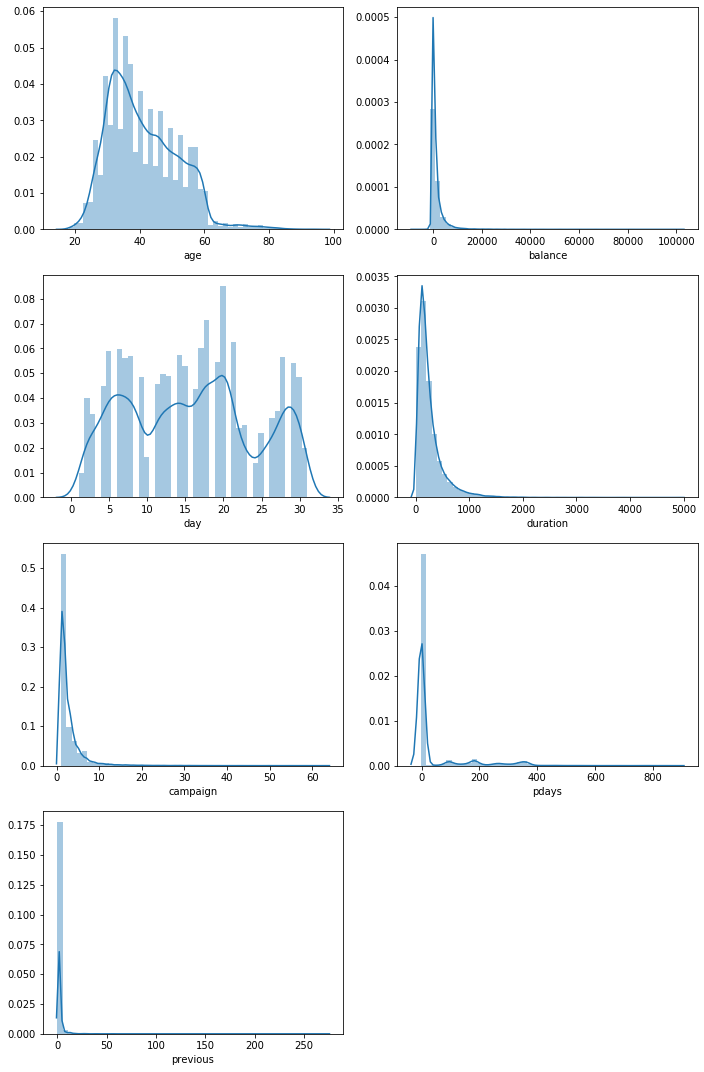

In [70]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() #to flatten subplot index positions
sns.distplot(data['age'],ax=axe[0]) #Distance plot of 'age'
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
sns.distributions._has_statsmodels = False
sns.distplot(data['pdays'],ax=axe[5])
sns.distplot(data['previous'],ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

# Inferences: 

<b>Age and day is somewhat symmetric i.e mean == median (here age - mean = 40.0 and median = 39.0 and day - mean = 15.806 and median = 16.0)</b>

<b>Rest are mostly right skew i.e mean > mode</b>

# Distribution of Categorical Features

F:\software\anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


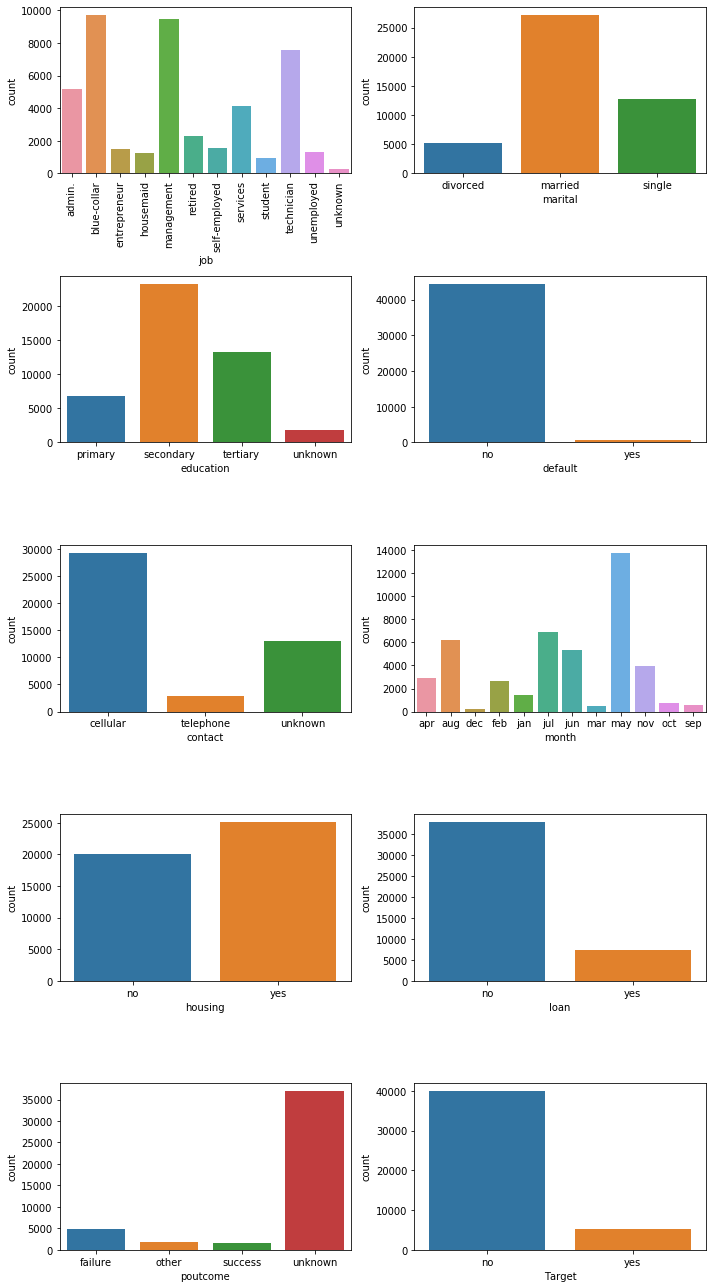

In [76]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() #to flatten subplot index positions
plot=sns.countplot(x=data['job'],data=data,ax=axe[0])
plt.setp(plot.get_xticklabels(), rotation=90)
sns.countplot(x=data['marital'],data=data,ax=axe[1])
sns.countplot(x=data['education'],data=data,ax=axe[2])
sns.countplot(x=data['default'],data=data,ax=axe[3])
sns.countplot(x=data['contact'],data=data,ax=axe[4])
sns.countplot(x=data['month'],data=data,ax=axe[5])
sns.countplot(x=data['housing'],data=data,ax=axe[6])
sns.countplot(x=data['loan'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[8])
sns.countplot(x=data['Target'],data=data,ax=axe[9])
fig.tight_layout()
fig.show()

# Inferences:
    
<b>More than 90% customers have no default credit

Around 88% customers have not subscribed for term deposit
    
Most customers have been contacted in may
    
Most customers have been contacted by cellular network(mobile phone)
    
Number of customers who have housing loan is more than the number of customers who don't have housing loan
    
Around 6% customers have credit in default</b>

# Measure of skewness of numerical feaures

In [85]:
data.skew().to_frame('Skewness Measure').T

,age,balance,day,duration,campaign,pdays,previous
Skewness Measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


# Checking Presence of Outliers

F:\software\anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


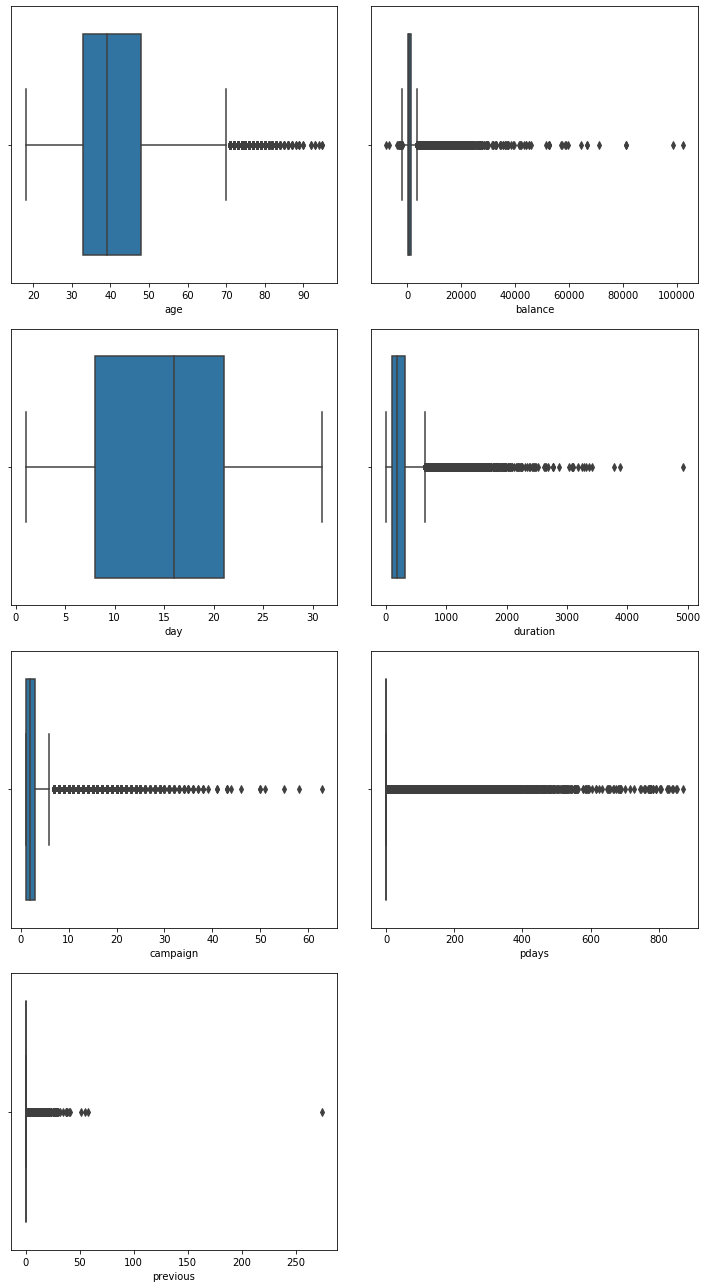

In [115]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() #to flatten subplot index positions
sns.boxplot(data['age'],ax=axe[0]) #Distance plot of 'age'
sns.boxplot(data['balance'],ax=axe[1])
sns.boxplot(data['day'],ax=axe[2])
sns.boxplot(data['duration'],ax=axe[3])
sns.boxplot(data['campaign'],ax=axe[4])
sns.boxplot(data['pdays'],ax=axe[5])
sns.boxplot(data['previous'],ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

# Inferences:

<b> There is no outlier in 'day' feature

'previous', 'pdays' and 'balance' has extreme outliers </b>

# Value count of Target feature

In [92]:
data['Target'].value_counts().to_frame('Target')

,Target
no,39922
yes,5289


# Data Preprocessing

# Label Encoding 

In [134]:
df= data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1.0,0,unknown,no


In [135]:
encoder = LabelEncoder()

In [136]:
df['default'] = encoder.fit_transform(df['default']).astype(int)
df['marital'] = encoder.fit_transform(df['marital']).astype(int)
df['education'] = encoder.fit_transform(df['education']).astype(int)
df['contact'] = encoder.fit_transform(df['contact']).astype(int)
df['loan'] = encoder.fit_transform(df['loan']).astype(int)
df['housing'] = encoder.fit_transform(df['housing']).astype(int)
df['poutcome'] = encoder.fit_transform(df['poutcome']).astype(int)
df['Target'] = encoder.fit_transform(df['Target']).astype(int)
df['month'] = encoder.fit_transform(df['month']).astype(int)
df['job'] = encoder.fit_transform(df['job']).astype(int)

In [137]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1.0,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1.0,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1.0,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1.0,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1.0,0,3,0


In [138]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1.0,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1.0,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184.0,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1.0,0,3,0
45210,37,2,1,1,0,2971,0,0,0,17,9,361,2,188.0,11,1,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  int32  
 2   marital    45211 non-null  int32  
 3   education  45211 non-null  int32  
 4   default    45211 non-null  int32  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int32  
 7   loan       45211 non-null  int32  
 8   contact    45211 non-null  int32  
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int32  
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int32  
 16  Target     45211 non-null  int32  
dtypes: float64(1), int32(10), int64(6)
memory usage: 4.1 MB


In [102]:
df[['job','marital','education','default','housing','loan','contact','month',
      'poutcome','Target']]=df[['job','marital','education','default','housing','loan','contact','month',
      'poutcome','Target']].apply(pd.Categorical)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  float64 
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), float64(1), int64(6)
memory usage: 2.8 MB


In [140]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1.0,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1.0,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1.0,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1.0,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1.0,0,3,0


# Handling Outliers with mean replacement

In [141]:
meanbal = float(df['balance'].mean())
df['balance'] = np.where(df['balance']>np.percentile(df['balance'], 75), meanbal, df['balance'])

meandur = float(df['duration'].mean())
df['duration'] = np.where(df['duration']>np.percentile(df['duration'], 75), meanbal, df['duration'])

meanpd = float(df['pdays'].mean())
df['pdays'] = np.where(df['pdays']>np.percentile(df['pdays'], 75), meanbal, df['pdays'])


meancmp = float(df['campaign'].mean())
df['campaign'] = np.where(df['campaign']>np.percentile(df['campaign'], 75), meanbal, df['campaign'])


meanpr = float(df['previous'].mean())
df['previous'] = np.where(df['previous']>np.percentile(df['previous'], 75), meanbal, df['previous'])


F:\software\anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


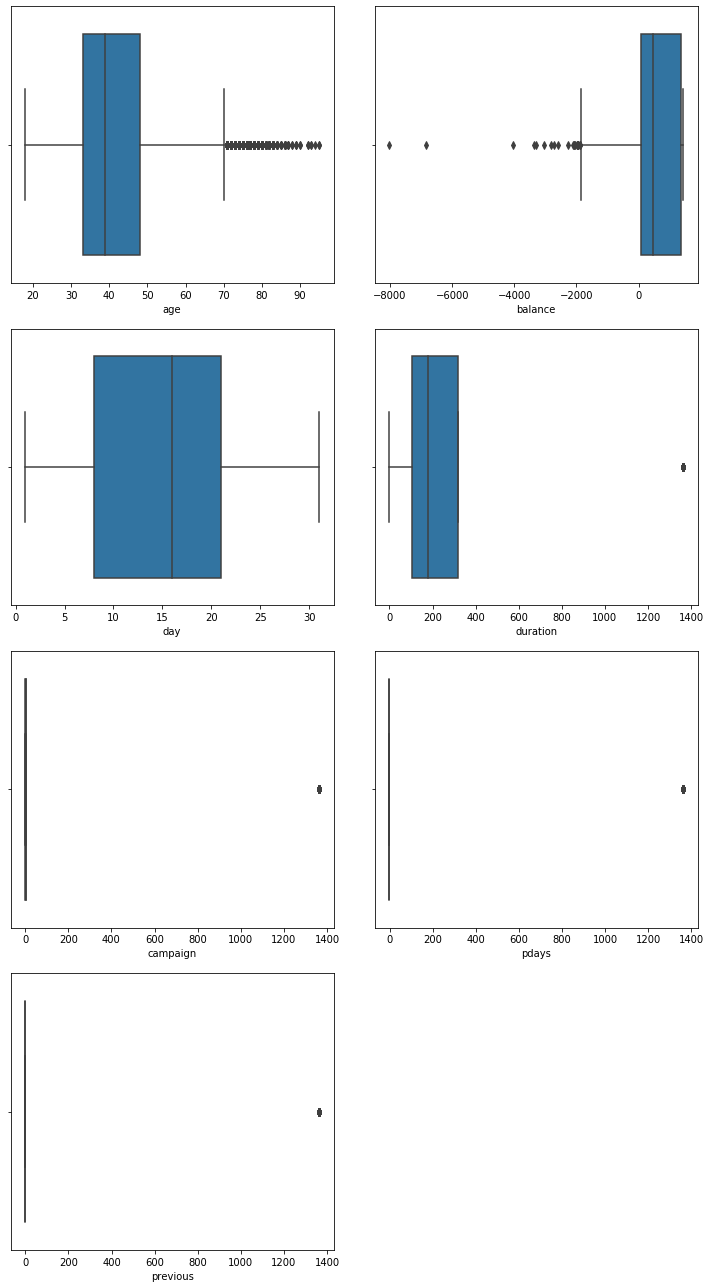

In [142]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() #to flatten subplot index positions
sns.boxplot(df['age'],ax=axe[0]) #Distance plot of 'age'
sns.boxplot(df['balance'],ax=axe[1])
sns.boxplot(df['day'],ax=axe[2])
sns.boxplot(df['duration'],ax=axe[3])
sns.boxplot(df['campaign'],ax=axe[4])
sns.boxplot(df['pdays'],ax=axe[5])
sns.boxplot(df['previous'],ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

# Inferences:

<b> Now we can see less outliers as compared to previous because of mean replacement</b>

# Correlation plot of all features after removing outliers

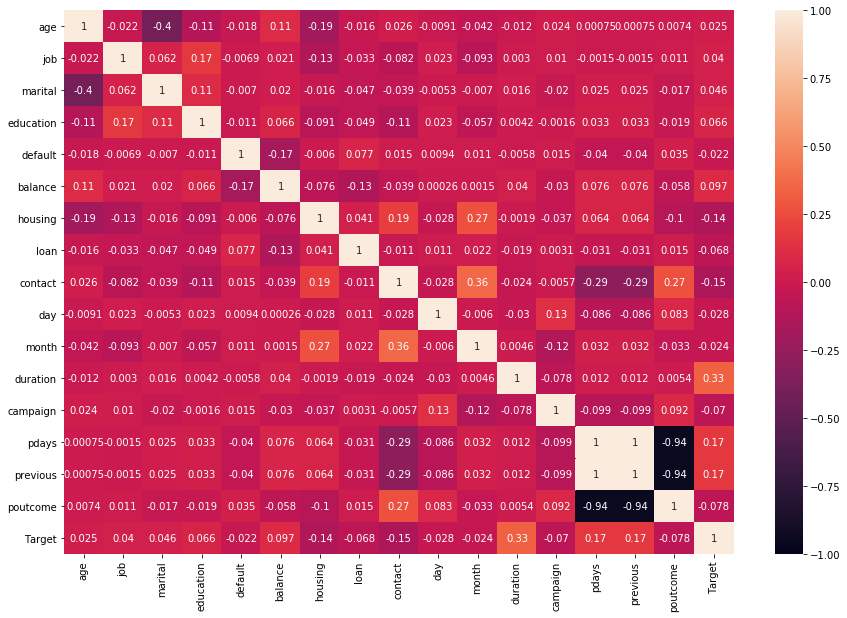

In [143]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1)

# Correlation Plot of all features without removing outliers

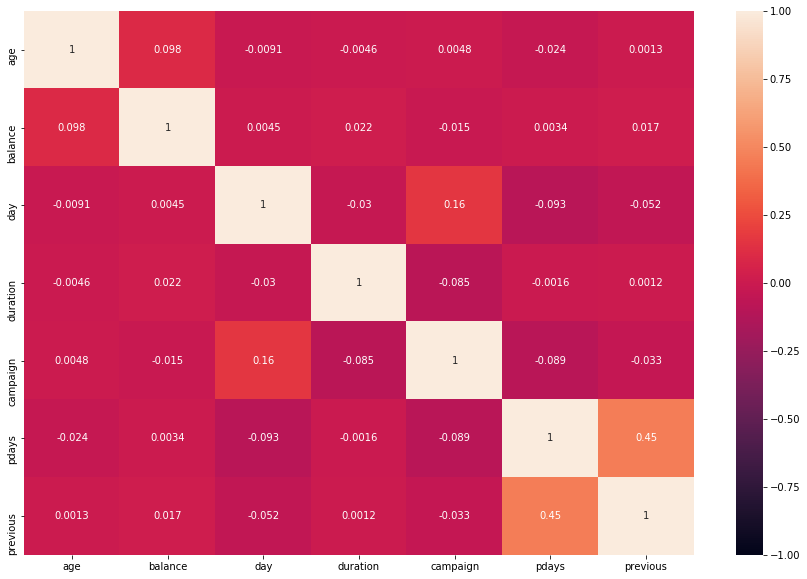

In [145]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1)

# Inferences:

<b> Here we have compare corr plots of data without and with outliers respectively and find that after removing outliers pdays and previous are highly positive correlated and also correlation between some of features have been improved</b>

# Removal of unwanted features

<b> job','education' and 'contact' attributes contain multiple unknown values.
    
As they are specific string values and not numerical so cannot be treated with median, mean replacement
    
 As per data description, duration attribute is removed to have a realistic prediction.
    
'day' and 'month' of contact will not have any realtionship with customer opting for subscription
    
'pdays' and 'previous' are highly correlated so removing any one from both of them.
    
Even though 'poutcome' has a huge number of 'Unknown' values, it is kept because 'poutcome' is outcome of the previous marketing campaign. Which can help in better training and testing of models.</b>


In [147]:
df2 = df.drop(['job','education', 'duration', 'contact', 'pdays', 'day', 'month'], axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot of features

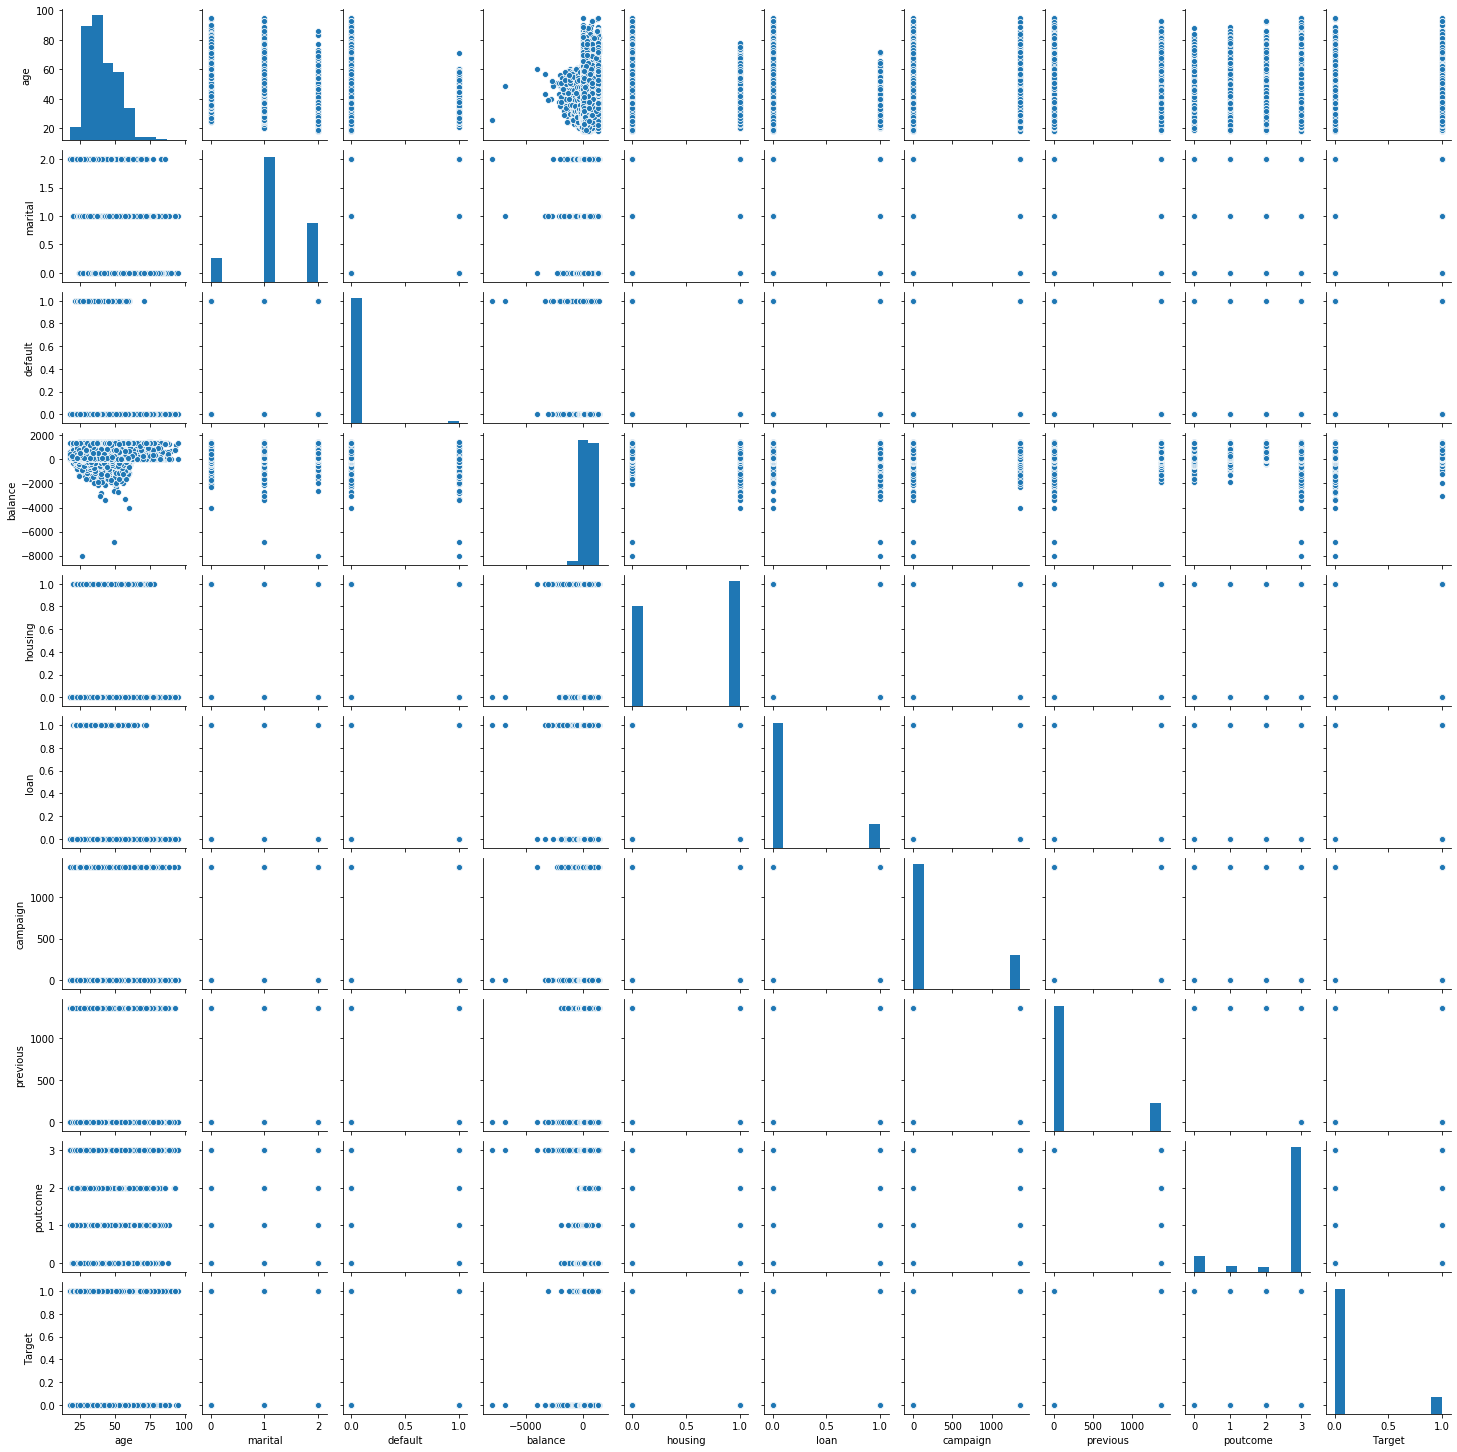

In [150]:
sns.pairplot(df2, height=2) #to know the importance of data

# Splitting data for training and testing

In [151]:
x = df2.drop('Target', axis=1)
y = df2['Target']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=0)

# Scaling the data

<b><span style='color:red'>Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. 
It is performed during the data pre-processing to handle highly varying magnitudes or values or units. 
If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.</span></b>

<b>Example: If an algorithm is not using feature scaling method then it can consider the value 3000 meter to be greater than 5 km but
that’s actually not true and in this case, the algorithm will give wrong predictions. So, we use Feature Scaling to bring all values to same magnitudes and thus, tackle this issue.</b>

In [152]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

# Building Models

# <span style='color:blue'> Logistic Regression </span>  

In [189]:
'''liblinear — Library for Large Linear Classification. Uses a coordinate descent algorithm. 
Coordinate descent is based on minimizing a multivariate function by solving univariate optimization problems in a loop. 
In other words, it moves toward the minimum in one direction at a time. It is the default solver for Scikit-learn versions earlier than 0.22.0. 
It performs pretty well with high dimensionality. It does have a number of drawbacks. 
It can get stuck, is unable to run in parallel, and can only solve multi-class logistic regression with one-vs.-rest.'''

logic_r = LogisticRegression(solver='liblinear') 
logic_r.fit(xtrain_scaled, ytrain)
y_pred = logic_r.predict(xtest_scaled)

LR_accuracy = accuracy_score(ytest, y_pred)
print("LR_accuracy Score = ", LR_accuracy)
print("Confusion_Matrix Score\n", confusion_matrix(ytest, y_pred))
print("\nClassification_Report\n", classification_report(ytest, y_pred))

LR_accuracy Score =  0.8909653875926131
Confusion_Matrix Score
 [[7892   88]
 [ 898  165]]

Classification_Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.65      0.16      0.25      1063

    accuracy                           0.89      9043
   macro avg       0.78      0.57      0.60      9043
weighted avg       0.87      0.89      0.86      9043



# <span style='color:blue'> Naive Bayes  </span> 

In [188]:
NB = GaussianNB()
NB.fit(xtrain_scaled,ytrain)
y_predict = NB.predict(xtest_scaled)


NB_accuracy = accuracy_score(ytest, y_predict)
print("NB_accuracy Score = ", NB_accuracy)
print("Confusion_Matrix Score\n", confusion_matrix(ytest, y_predict))
print("\nClassification_Report\n", classification_report(ytest, y_predict))


NB_accuracy Score =  0.8327988499391795
Confusion_Matrix Score
 [[7185  795]
 [ 717  346]]

Classification_Report
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      7980
           1       0.30      0.33      0.31      1063

    accuracy                           0.83      9043
   macro avg       0.61      0.61      0.61      9043
weighted avg       0.84      0.83      0.84      9043



# <span style='color:blue'> SVC </span> 

In [159]:
svc = SVC()
svc.fit(xtrain_scaled,ytrain)
y_predicts = svc.predict(xtest_scaled)

SVC_accuracy = accuracy_score(ytest, y_predicts)
print("SVC_accuracy Score = ", SVC_accuracy)
print("Confusion_Matrix Score\n", confusion_matrix(ytest, y_predicts))
print("\nClassification_Report\n", classification_report(ytest, y_predicts))

SVC_accuracy Score =  0.8912971359062258
Confusion_Matrix Score =  <function confusion_matrix at 0x000002D87F1575E8>
Classification_Report =                precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.63      0.18      0.28      1063

    accuracy                           0.89      9043
   macro avg       0.77      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



# <span style='color:blue' > KNN </span>

In [187]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain_scaled,ytrain)
y_knnpredicts = knn.predict(xtest_scaled)

knn_accuracy = accuracy_score(ytest, y_knnpredicts)
print("KNN_accuracy Score = ", knn_accuracy)
print("Confusion_Matrix Score\n", confusion_matrix(ytest, y_knnpredicts))
print("\nClassification_Report\n", classification_report(ytest, y_knnpredicts))

KNN_accuracy Score =  0.8718345681742784
Confusion_Matrix Score
 [[7657  323]
 [ 836  227]]

Classification_Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      7980
           1       0.41      0.21      0.28      1063

    accuracy                           0.87      9043
   macro avg       0.66      0.59      0.61      9043
weighted avg       0.84      0.87      0.85      9043



#  Feature Importance of Tree

In [ ]:
xvar = df2.drop('Target', axis=1) #variables in x
feature_cols = xvar.columns # columns in x
feat_importance = dt.tree_.compute_feature_importances(normalize=False) #compute feature importance


feat_imp_dict = dict(zip(feature_cols, dt.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order



# <span style='color:blue'> Pruning of Tree </span>

In [191]:
dt = DecisionTreeClassifier(criterion='gini', random_state=0)
dt.fit(xtrain_scaled,ytrain)
y_dtpredicts = dt.predict(xtest_scaled)

dt_accuracy = accuracy_score(ytest, y_dtpredicts)
print("Decision Tree_accuracy Score = ", dt_accuracy)
print("Confusion_Matrix Score = ", confusion_matrix)
print("Classification_Report = ", classification_report(ytest, y_dtpredicts))


Decision Tree_accuracy Score =  0.833020015481588
Confusion_Matrix Score =  <function confusion_matrix at 0x000002D87F1575E8>
Classification_Report =                precision    recall  f1-score   support

           0       0.90      0.91      0.91      7980
           1       0.27      0.24      0.26      1063

    accuracy                           0.83      9043
   macro avg       0.58      0.58      0.58      9043
weighted avg       0.83      0.83      0.83      9043



# <span style='color:blue'> Bagging Ensemble</span>

In [186]:
bagc = BaggingClassifier(base_estimator=dt, n_estimators=500, random_state=1)
bagc.fit(xtrain_scaled,ytrain)
y_bagcpredicts = bagc.predict(xtest_scaled)

bagc_accuracy = accuracy_score(ytest, y_bagcpredicts)
print("Bagging Ensemble_accuracy Score = ", bagc_accuracy)
print("Confusion_Matrix Score\n", confusion_matrix(ytest, y_bagcpredicts))
print("\nClassification_Report\n", classification_report(ytest, y_bagcpredicts))

Bagging Ensemble_accuracy Score =  0.8719451509454826
Confusion_Matrix Score
 [[7647  333]
 [ 825  238]]

Classification_Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      7980
           1       0.42      0.22      0.29      1063

    accuracy                           0.87      9043
   macro avg       0.66      0.59      0.61      9043
weighted avg       0.85      0.87      0.85      9043



# <span style='color:blue'> Adaptive Boosting </span>

In [185]:
adab = AdaBoostClassifier( n_estimators=50, random_state=1)
adab.fit(xtrain_scaled,ytrain)
y_adabpredicts = adab.predict(xtest_scaled)

adab_accuracy = accuracy_score(ytest, y_adabpredicts)
print("Adaptive Boosting_accuracy Score = ", adab_accuracy)
print("Confusion_Matrix Score\n ", confusion_matrix(ytest, y_adabpredicts))
print("\nClassification_Report\n", classification_report(ytest, y_adabpredicts))

Adaptive Boosting_accuracy Score =  0.8909653875926131
Confusion_Matrix Score
  [[7887   93]
 [ 893  170]]

Classification_Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.65      0.16      0.26      1063

    accuracy                           0.89      9043
   macro avg       0.77      0.57      0.60      9043
weighted avg       0.87      0.89      0.86      9043



# <span style='color:blue'> Random Forest </span>

In [184]:
rand = RandomForestClassifier(n_estimators=100,random_state=1, max_features=3)
rand.fit(xtrain_scaled,ytrain)
y_randpredicts = rand.predict(xtest_scaled)

rand_accuracy = accuracy_score(ytest, y_randpredicts)
print("Random Forest_accuracy Score = ", rand_accuracy)
print("Confusion_Matrix Score\n", confusion_matrix(ytest, y_randpredicts))

print("\nClassification_Report\n", classification_report(ytest, y_randpredicts))

Random Forest_accuracy Score =  0.870286409377419
Confusion_Matrix Score
 [[7624  356]
 [ 817  246]]

Classification_Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      7980
           1       0.41      0.23      0.30      1063

    accuracy                           0.87      9043
   macro avg       0.66      0.59      0.61      9043
weighted avg       0.85      0.87      0.85      9043



# <span style='color:blue'> Gradient Boosting </span>

In [181]:
grad = GradientBoostingClassifier(n_estimators=100, random_state=1)
grad.fit(xtrain_scaled,ytrain)
y_gradpredicts = grad.predict(xtest_scaled)

grad_accuracy = accuracy_score(ytest, y_gradpredicts)
print("Confusion_Matrix Score\n ", confusion_matrix(ytest, y_gradpredicts))
print("\nGradient Boosting_accuracy Score\t ", grad_accuracy)
print("\nClassification_Report\n", classification_report(ytest, y_gradpredicts))

Confusion_Matrix Score
  [[7889   91]
 [ 899  164]]

Gradient Boosting_accuracy Score	  0.8905230565077961

Classification_Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.64      0.15      0.25      1063

    accuracy                           0.89      9043
   macro avg       0.77      0.57      0.59      9043
weighted avg       0.87      0.89      0.86      9043



# Model with Accuracy Scores

In [168]:
scores = [('Naive Bayes', NB_accuracy),
        ('KNN', knn_accuracy),
         ('Decision Tree', dt_accuracy),
         ('Gradien Boosting', grad_accuracy),
         ('Random Forest', rand_accuracy),
         ('Adaptive Boosting', adab_accuracy),
         ('Bagging Ensemble', bagc_accuracy),
         ('Logistic Regression', LR_accuracy),
         ('Support Vector Classifier', SVC_accuracy)]

scores = pd.DataFrame(scores, columns=['Model', 'Accuracy Score'])
scores.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score
8,Support Vector Classifier,0.891297
5,Adaptive Boosting,0.890965
7,Logistic Regression,0.890965
3,Gradien Boosting,0.890523
6,Bagging Ensemble,0.871945
1,KNN,0.871835
4,Random Forest,0.870286
2,Decision Tree,0.833020
0,Naive Bayes,0.832799


In [ ]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=180)
plt.show()

# Comments on dataset:
<b>The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models.
    
The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models.

Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.
    
This situation could have been avoided if the datset was balanced.
    
Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.</b>
    
# Comments on Models:
    
<b>When benchmarking with 'duration' column, Support Vector Classifier achieved 90% model accuracy while naive bayes score was 85% accurate.
    
SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.
After removing the 'duration' column, The highest model score dropped by 0.5%.
    
The Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores, getting rid of outliers by mean/median replacement did not affect the scores.
    
In Decision Trees, Gradient boosting method always performed better for this dataset.
    
While visualizing Decision Tree, The Pruned decision tree was easy to visualize as it had lesser leaf nodes than Tree which was not pruned.
</b>
